In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.cluster import KMeans


In [128]:
data = pd.read_csv("data.csv")

In [129]:
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [130]:
data = data.rename({'User ID':'ID', 
             'Fan Challenges Completed': 'ChallengesComp',
             'Predictive Accuracy (%)': 'PredAcc',
             'Virtual Merchandise Purchases': 'VirtMerch',
             'Sponsorship Interactions (Ad Clicks)': 'SponsInteraction',
             'Time on Live 360 (mins)': 'LiveTime',
             'Real-Time Chat Activity (Messages Sent)': 'ChatActivity'}, axis=1)

# renaming columns for ease of analysis

In [46]:
data.head()

,ID,ChallengesComp,PredAcc,VirtMerch,SponsInteraction,LiveTime,ChatActivity
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [131]:
data.isnull().sum()
# there are no missing values

ID                  0
ChallengesComp      0
PredAcc             0
VirtMerch           0
SponsInteraction    0
LiveTime            0
ChatActivity        0
dtype: int64

In [132]:
data[data.duplicated(subset=['ID'])]

# no duplicate occurences of User ID

,ID,ChallengesComp,PredAcc,VirtMerch,SponsInteraction,LiveTime,ChatActivity


In [133]:
data.describe()

,ChallengesComp,PredAcc,VirtMerch,SponsInteraction,LiveTime,ChatActivity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


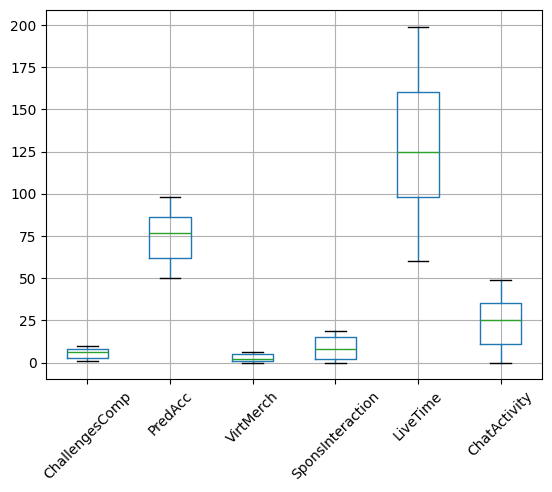

In [134]:
data.boxplot(column=['ChallengesComp','PredAcc','VirtMerch','SponsInteraction','LiveTime','ChatActivity'])
plt.xticks(rotation=45)
plt.show()

# no outliers in the data

In [135]:
data

,ID,ChallengesComp,PredAcc,VirtMerch,SponsInteraction,LiveTime,ChatActivity
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40


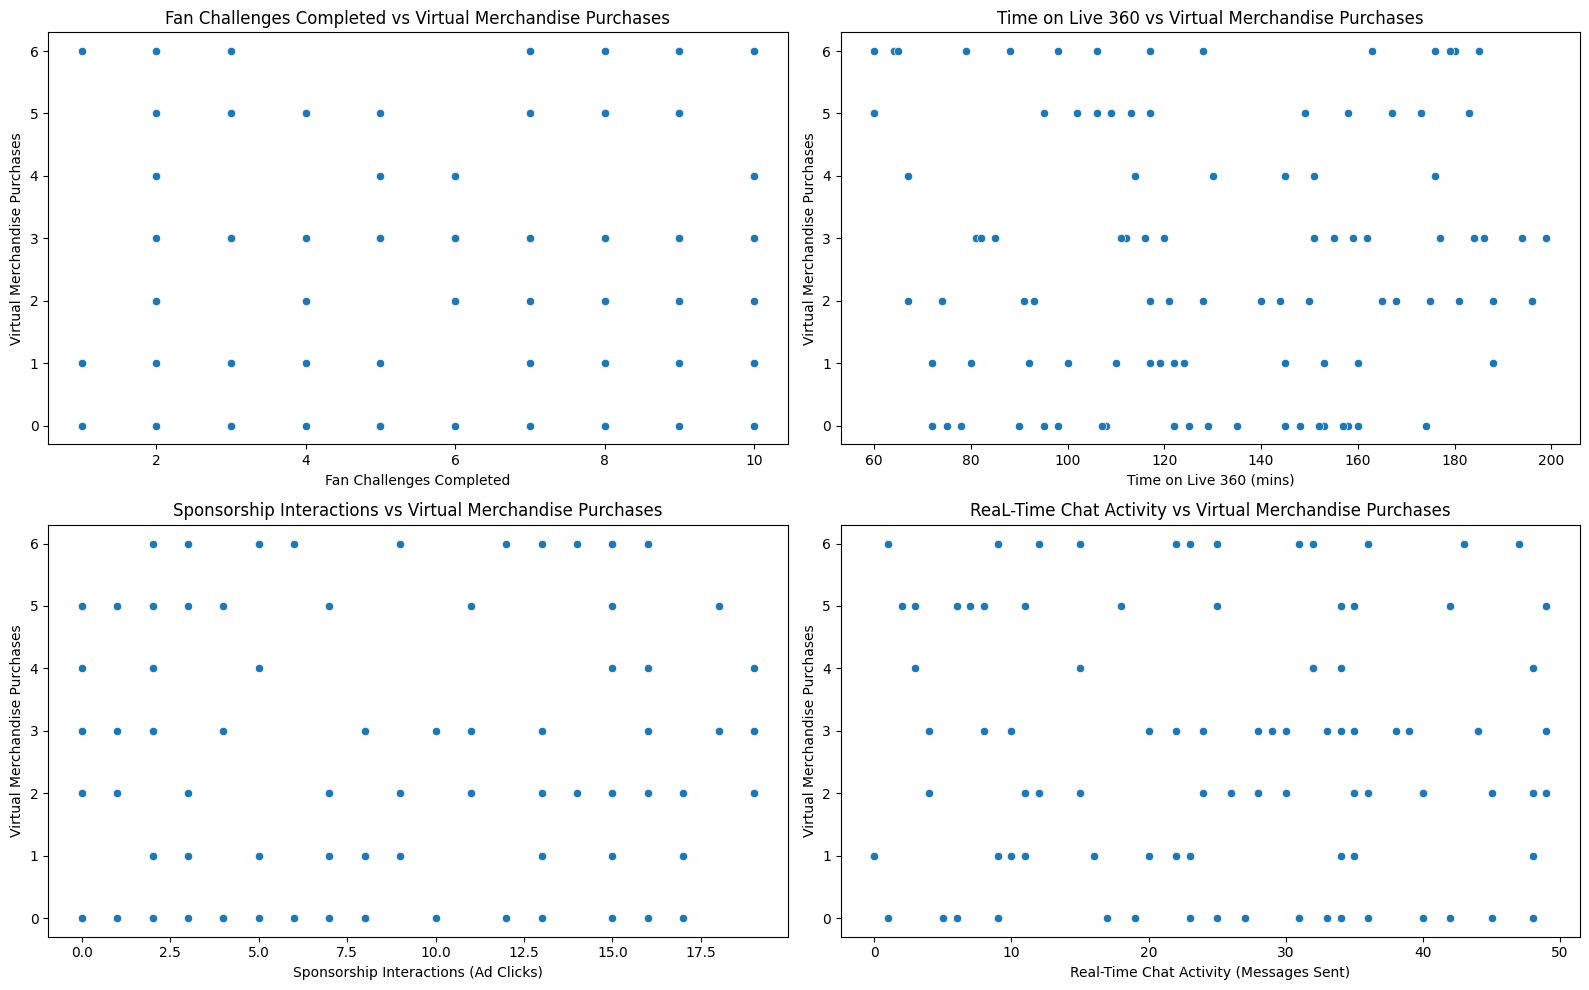

In [136]:
fig, axs = plt.subplots(2,2, figsize=(16,10))
sns.scatterplot(x=data['ChallengesComp'],y=data['VirtMerch'], ax=axs[0,0])
axs[0,0].set_title('Fan Challenges Completed vs Virtual Merchandise Purchases')
axs[0,0].set_xlabel('Fan Challenges Completed')
axs[0,0].set_ylabel('Virtual Merchandise Purchases')

sns.scatterplot(x=data['LiveTime'],y=data['VirtMerch'], ax=axs[0,1])
axs[0,1].set_title('Time on Live 360 vs Virtual Merchandise Purchases')
axs[0,1].set_xlabel('Time on Live 360 (mins)')
axs[0,1].set_ylabel('Virtual Merchandise Purchases')

sns.scatterplot(x=data['SponsInteraction'],y=data['VirtMerch'], ax=axs[1,0])
axs[1,0].set_title('Sponsorship Interactions vs Virtual Merchandise Purchases')
axs[1,0].set_xlabel('Sponsorship Interactions (Ad Clicks)')
axs[1,0].set_ylabel('Virtual Merchandise Purchases')

sns.scatterplot(x=data['ChatActivity'],y=data['VirtMerch'], ax=axs[1,1])
axs[1,1].set_title('ReaL-Time Chat Activity vs Virtual Merchandise Purchases')
axs[1,1].set_xlabel('Real-Time Chat Activity (Messages Sent)')
axs[1,1].set_ylabel('Virtual Merchandise Purchases')

plt.tight_layout()
plt.show()

In [137]:
correlationMatrix = data[['ChallengesComp','LiveTime','SponsInteraction','ChatActivity','VirtMerch']].corr()
correlationMatrix['VirtMerch']

ChallengesComp      0.159378
LiveTime           -0.007527
SponsInteraction    0.070550
ChatActivity       -0.044676
VirtMerch           1.000000
Name: VirtMerch, dtype: float64

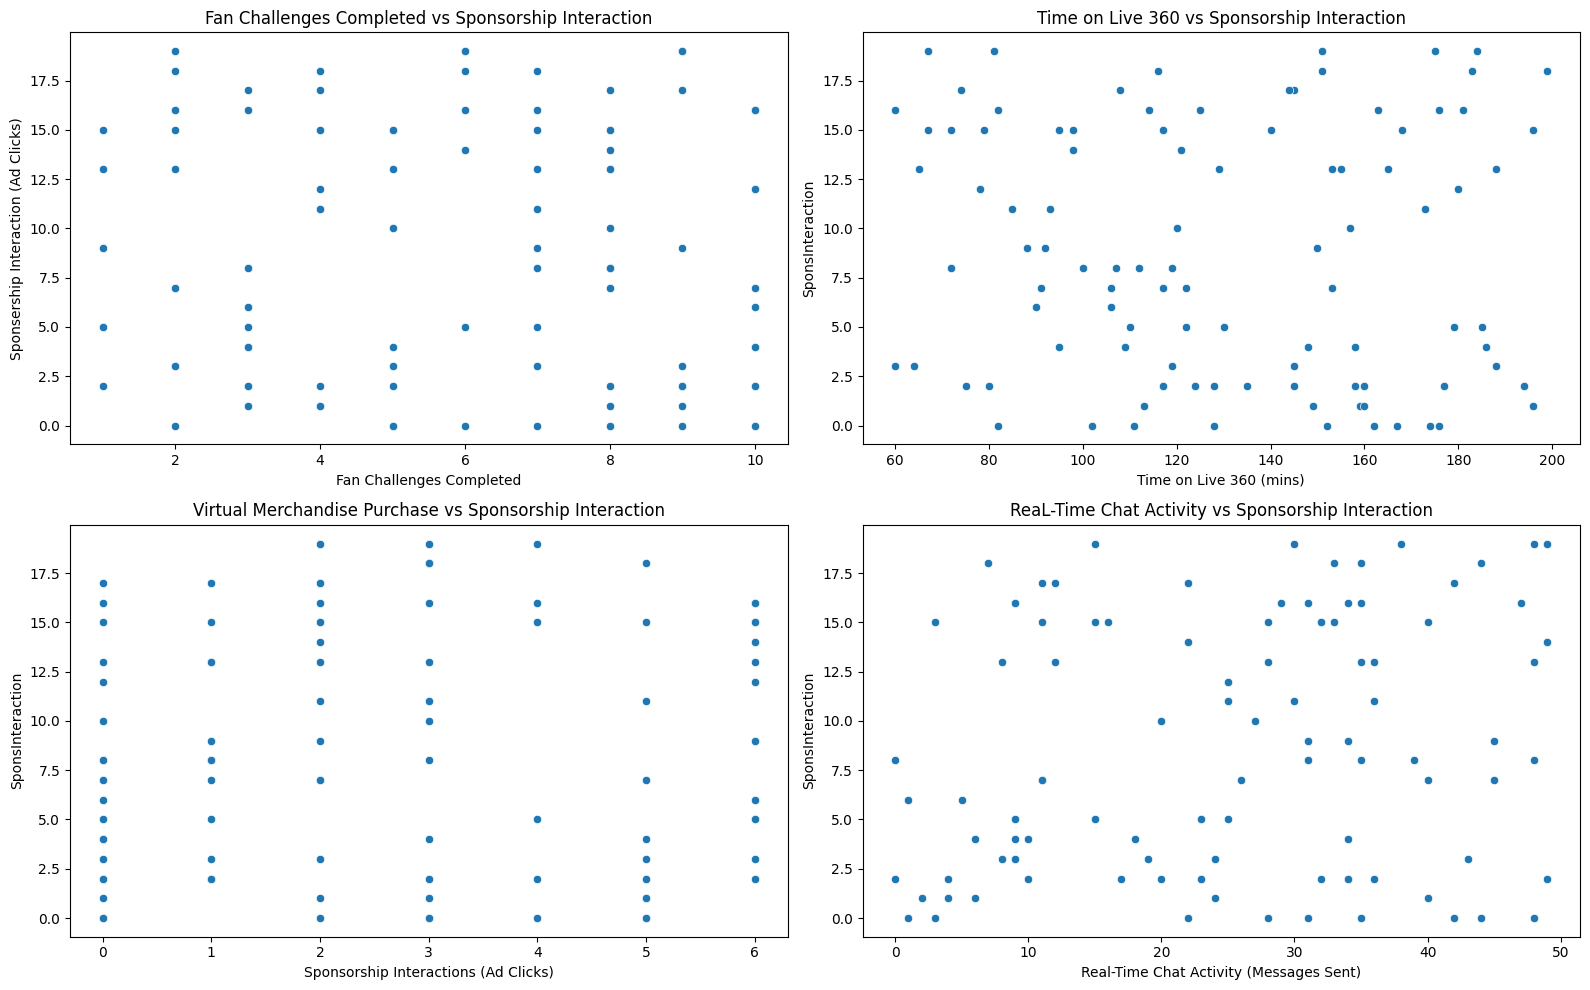

In [138]:
fig, axs = plt.subplots(2,2, figsize=(16,10))
sns.scatterplot(x=data['ChallengesComp'],y=data['SponsInteraction'], ax=axs[0,0])
axs[0,0].set_title('Fan Challenges Completed vs Sponsorship Interaction')
axs[0,0].set_xlabel('Fan Challenges Completed')
axs[0,0].set_ylabel('Sponsership Interaction (Ad Clicks)')

sns.scatterplot(x=data['LiveTime'],y=data['SponsInteraction'], ax=axs[0,1])
axs[0,1].set_title('Time on Live 360 vs Sponsorship Interaction')
axs[0,1].set_xlabel('Time on Live 360 (mins)')
axs[0,0].set_ylabel('Sponsership Interaction (Ad Clicks)')

sns.scatterplot(x=data['VirtMerch'],y=data['SponsInteraction'], ax=axs[1,0])
axs[1,0].set_title('Virtual Merchandise Purchase vs Sponsorship Interaction')
axs[1,0].set_xlabel('Sponsorship Interactions (Ad Clicks)')
axs[0,0].set_ylabel('Sponsership Interaction (Ad Clicks)')

sns.scatterplot(x=data['ChatActivity'],y=data['SponsInteraction'], ax=axs[1,1])
axs[1,1].set_title('ReaL-Time Chat Activity vs Sponsorship Interaction')
axs[1,1].set_xlabel('Real-Time Chat Activity (Messages Sent)')
axs[0,0].set_ylabel('Sponsership Interaction (Ad Clicks)')

plt.tight_layout()
plt.show()

In [139]:
correlationMatrix = data[['ChallengesComp','LiveTime','SponsInteraction','ChatActivity','VirtMerch']].corr()
correlationMatrix['SponsInteraction']

ChallengesComp     -0.065239
LiveTime           -0.073929
SponsInteraction    1.000000
ChatActivity        0.191292
VirtMerch           0.070550
Name: SponsInteraction, dtype: float64

In [140]:
X = data[['ChallengesComp','LiveTime','SponsInteraction','ChatActivity']]
y = (data['VirtMerch'] > data['VirtMerch'].mean()).astype(int)

# 1 = will buy merchandise than mean
# 0 = will buy less merchandise than mean

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

In [141]:
accuracy_score(y_test, y_pred)

0.55

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.57      0.40      0.47        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20



In [143]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_[0]
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


            Feature  Coefficient
0    ChallengesComp     0.081571
2  SponsInteraction     0.007240
1          LiveTime     0.000792
3      ChatActivity    -0.006234


In [175]:
X = data[['ChallengesComp','SponsInteraction']]
y = (data['VirtMerch'] > data['VirtMerch'].mean()).astype(int)

# 1 = will buy merchandise than mean
# 0 = will buy less merchandise than mean

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [176]:
accuracy_score(y_test,y_pred)

0.65

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.64      0.70      0.67        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



In [178]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model2.coef_[0]
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


            Feature  Coefficient
0    ChallengesComp     0.080848
1  SponsInteraction     0.003030


In [179]:
X = data[['ChallengesComp','LiveTime','SponsInteraction','ChatActivity']]
y = (data['VirtMerch'] > data['VirtMerch'].mean()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model3 = LogisticRegression()

efs = EFS(model3, 
          min_features=1,
          max_features=len(X.columns),
          scoring='accuracy',
          print_progress=True,
          cv=5)

efs = efs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` in

In [181]:
efs.best_feature_names_

('ChallengesComp',)

In [207]:
X_cluster = data[['ChallengesComp','LiveTime','SponsInteraction','ChatActivity','VirtMerch']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster)

In [208]:
data['Cluster'] = kmeans.fit_predict(X_cluster)

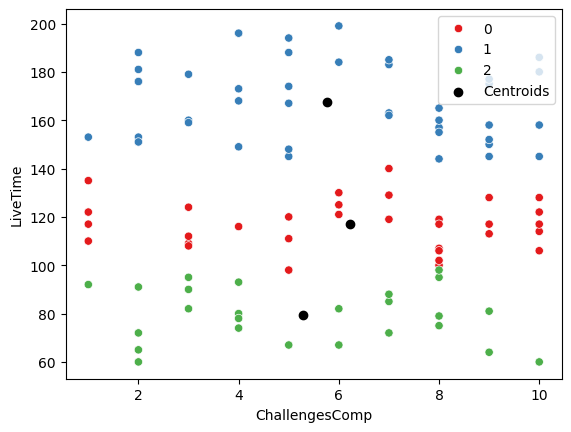

In [218]:
sns.scatterplot(x=data['ChallengesComp'], y=data['LiveTime'], hue=data['Cluster'], palette='Set1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', marker='o', label='Centroids')
plt.legend()
plt.show()